In [21]:
import soundfile as sf
import pedalboard as pdb
from IPython.display import display, Audio
import math
from audiotsm import wsola
from audiotsm.io.array import ArrayReader, ArrayWriter
import numpy as np

def voice_changer(input_file, output_file, pitch_factor=2.0, speed_factor=1.0, formant_shift_khz=0.5, reverb_wet_level=0.1, chorus_mix=0.25):
    """
    Changes the voice in an audio file using high-quality effects.

    Args:
        input_file (str): The path to the input audio file.
        output_file (str): The path to save the modified audio file.
        pitch_factor (float): The factor by which to shift the pitch.
        speed_factor (float): The factor by which to speed up the audio.
        formant_shift_khz (float): The cutoff for a high-pass filter to simulate a formant shift.
        reverb_wet_level (float): The amount of reverb to apply (0.0 to 1.0).
        chorus_mix (float): The mix of the chorus effect (0.0 to 1.0).
    """
    print(f"Loading audio from: {input_file}")
    audio, sample_rate = sf.read(input_file)

    # --- Input Validation ---
    if pitch_factor <= 0 or speed_factor <= 0:
        print("Error: Pitch and speed factors must be positive numbers.")
        return

    # 1. Pitch Shifting using Pedalboard
    semitones = 12 * math.log2(pitch_factor)
    
    # Create a list of effects to apply
    effects = []

    # Add formant-shifting high-pass filter
    if formant_shift_khz > 0:
        effects.append(pdb.HighpassFilter(cutoff_frequency_hz=formant_shift_khz * 1000))

    # Add the main pitch shift effect
    effects.append(pdb.PitchShift(semitones=semitones))
    
    # Add chorus for richness
    if chorus_mix > 0:
        effects.append(pdb.Chorus(mix=chorus_mix))

    # Add reverb for space
    if reverb_wet_level > 0:
        effects.append(pdb.Reverb(wet_level=reverb_wet_level, dry_level=1.0 - reverb_wet_level))

    # Create the pedalboard with all selected effects
    board = pdb.Pedalboard(effects)
    pitched_audio = board(audio, sample_rate)

    # Ensure audio is in the correct format for audiotsm (channels, samples)
    if len(pitched_audio.shape) == 1:
        pitched_audio = pitched_audio[np.newaxis, :]
    else:
        pitched_audio = pitched_audio.T

    # 2. Time Stretching using audiotsm
    reader = ArrayReader(pitched_audio)
    writer = ArrayWriter(channels=reader.channels)
    tsm = wsola(channels=reader.channels, speed=speed_factor)
    tsm.run(reader, writer)
    stretched_audio = writer.data.T.squeeze()

    # Export the modified audio
    sf.write(output_file, stretched_audio, sample_rate)
    print(f"Voice changed successfully! Saved to {output_file}")

# --- Start of user-specific code ---

# ===-===-===-===-===-===-===-===-===-===-===-===-===-===
# --- EDIT YOUR PARAMETERS HERE ---
#
# PITCH: Higher value means a higher pitch (e.g., 2.0 is one octave higher).
PITCH = 1.25
#
# SPEED: Higher value means faster audio (1.0 is original speed).
SPEED = 1.0
#
# FORMANT: Removes low frequencies to sound "smaller". Good values are 0.1 to 0.8.
#          Set to 0 to disable.
FORMANT_SHIFT = 0.8
#
# REVERB: Adds a sense of space. Good values are 0.1 to 0.3.
#         Set to 0 to disable.
REVERB_WET_LEVEL = 0.1
#
# CHORUS: Adds a subtle doubling effect. Good values are 0.2 to 0.5.
#         Set to 0 to disable.
CHORUS_MIX = 0.05
#
# ===-===-===-===-===-===-===-===-===-===-===-===-===-===

In [22]:

# Define the path to your audio file
voice_path = r"d:\OneDrive - Green Energy\Sakib\Germany\Hamzabilgen\audio_files\ALL\A-1.wav"
output_path = "female_kid_voice.wav"

# Process the specified audio file
voice_changer(voice_path, output_path, 
              pitch_factor=PITCH, 
              speed_factor=SPEED,
              formant_shift_khz=FORMANT_SHIFT,
              reverb_wet_level=REVERB_WET_LEVEL,
              chorus_mix=CHORUS_MIX)

# Display interactive play buttons
print("Original Audio:")
display(Audio(voice_path))

print("\nModified Audio:")
display(Audio(output_path))


Loading audio from: d:\OneDrive - Green Energy\Sakib\Germany\Hamzabilgen\audio_files\ALL\A-1.wav
Voice changed successfully! Saved to female_kid_voice.wav
Original Audio:



Modified Audio:


# Batch

In [ ]:
import soundfile as sf
import pedalboard as pdb
import math
from audiotsm import wsola
from audiotsm.io.array import ArrayReader, ArrayWriter
import numpy as np
import os # <-- Added for file/directory operations

def voice_changer(input_file, output_file, pitch_factor=2.0, speed_factor=1.0, formant_shift_khz=0.5, reverb_wet_level=0.1, chorus_mix=0.25):
    """
    Changes the voice in an audio file using high-quality effects.

    Args:
        input_file (str): The path to the input audio file.
        output_file (str): The path to save the modified audio file.
        pitch_factor (float): The factor by which to shift the pitch.
        speed_factor (float): The factor by which to speed up the audio.
        formant_shift_khz (float): The cutoff for a high-pass filter to simulate a formant shift.
        reverb_wet_level (float): The amount of reverb to apply (0.0 to 1.0).
        chorus_mix (float): The mix of the chorus effect (0.0 to 1.0).
    """
    try:
        print(f"Loading audio from: {input_file}")
        audio, sample_rate = sf.read(input_file)

        # --- Input Validation ---
        if pitch_factor <= 0 or speed_factor <= 0:
            print(f"Error: Pitch and speed factors must be positive. Skipping {input_file}")
            return

        # 1. Pitch Shifting using Pedalboard
        semitones = 12 * math.log2(pitch_factor)
        
        # Create a list of effects to apply
        effects = []

        # Add formant-shifting high-pass filter
        if formant_shift_khz > 0:
            effects.append(pdb.HighpassFilter(cutoff_frequency_hz=formant_shift_khz * 1000))

        # Add the main pitch shift effect
        effects.append(pdb.PitchShift(semitones=semitones))
        
        # Add chorus for richness
        if chorus_mix > 0:
            effects.append(pdb.Chorus(mix=chorus_mix))

        # Add reverb for space
        if reverb_wet_level > 0:
            effects.append(pdb.Reverb(wet_level=reverb_wet_level, dry_level=1.0 - reverb_wet_level))

        # Create the pedalboard with all selected effects
        board = pdb.Pedalboard(effects)
        pitched_audio = board(audio, sample_rate)

        # Ensure audio is in the correct format for audiotsm (channels, samples)
        if len(pitched_audio.shape) == 1:
            pitched_audio = pitched_audio[np.newaxis, :]
        else:
            pitched_audio = pitched_audio.T

        # 2. Time Stretching using audiotsm
        reader = ArrayReader(pitched_audio)
        writer = ArrayWriter(channels=reader.channels)
        tsm = wsola(channels=reader.channels, speed=speed_factor)
        tsm.run(reader, writer)
        stretched_audio = writer.data.T.squeeze()

        # Export the modified audio
        sf.write(output_file, stretched_audio, sample_rate)
        print(f"✅ Voice changed successfully! Saved to {output_file}\n")
    except Exception as e:
        print(f"❌ Could not process file {input_file}. Error: {e}\n")


# --- Start of user-specific code ---

# ===-===-===-===-===-===-===-===-===-===-===-===-===-===
# --- 1. EDIT YOUR PARAMETERS HERE ---
#
# PITCH: Higher value means a higher pitch (e.g., 2.0 is one octave higher).
PITCH = 1.25
#
# SPEED: Higher value means faster audio (1.0 is original speed).
SPEED = 1.0
#
# FORMANT: Removes low frequencies to sound "smaller". Good values are 0.1 to 0.8.
#          Set to 0 to disable.
FORMANT_SHIFT = 0.8
#
# REVERB: Adds a sense of space. Good values are 0.1 to 0.3.
#         Set to 0 to disable.
REVERB_WET_LEVEL = 0.1
#
# CHORUS: Adds a subtle doubling effect. Good values are 0.2 to 0.5.
#         Set to 0 to disable.
CHORUS_MIX = 0.05
#
# ===-===-===-===-===-===-===-===-===-===-===-===-===-===
# --- 2. DEFINE YOUR FOLDERS HERE ---

# Define the path to the folder containing your original audio files
# Use 'r' before the string to handle Windows paths correctly
input_folder = r".\Audio\Original"

# Define the path for the output folder where converted files will be saved
output_folder = r".\Audio\converted_audio"

# ===-===-===-===-===-===-===-===-===-===-===-===-===-===
# --- 3. RUN THE SCRIPT ---

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List of supported audio file extensions
supported_extensions = ['.wav', '.mp3', '.flac', '.ogg', '.aiff']

# Check if the input folder exists
if not os.path.isdir(input_folder):
    print(f"Error: Input folder not found at '{input_folder}'")
else:
    # Loop through all files in the specified directory
    for filename in os.listdir(input_folder):
        # Check if the file has a supported audio extension
        if any(filename.lower().endswith(ext) for ext in supported_extensions):
            # Construct the full path for the input file
            input_path = os.path.join(input_folder, filename)
            
            # Construct the full path for the output file (same filename, new folder)
            output_path = os.path.join(output_folder, filename)

            # Process the audio file
            voice_changer(input_path, output_path,
                          pitch_factor=PITCH,
                          speed_factor=SPEED,
                          formant_shift_khz=FORMANT_SHIFT,
                          reverb_wet_level=REVERB_WET_LEVEL,
                          chorus_mix=CHORUS_MIX)

    print("--- Batch processing complete! ---")

Loading audio from: .\Audio\Original\B-(17).wav
✅ Voice changed successfully! Saved to .\Audio\converted_audio\B-(17).wav

--- Batch processing complete! ---


# Analysis

Starting audio file analysis...
Found 198 WAV files
Analyzing files...
Processing 1/198: openai-fm-nova-patient-teacher-(1).wav


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\intervals.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


Processing 2/198: openai-fm-nova-patient-teacher-(10).wav
Processing 3/198: openai-fm-nova-patient-teacher-(100).wav
Processing 4/198: openai-fm-nova-patient-teacher-(11).wav
Processing 5/198: openai-fm-nova-patient-teacher-(12).wav
Processing 6/198: openai-fm-nova-patient-teacher-(13).wav
Processing 7/198: openai-fm-nova-patient-teacher-(14).wav
Processing 8/198: openai-fm-nova-patient-teacher-(15).wav
Processing 9/198: openai-fm-nova-patient-teacher-(16).wav
Processing 10/198: openai-fm-nova-patient-teacher-(17).wav
Processing 11/198: openai-fm-nova-patient-teacher-(18).wav
Processing 12/198: openai-fm-nova-patient-teacher-(19).wav
Processing 13/198: openai-fm-nova-patient-teacher-(2).wav
Processing 14/198: openai-fm-nova-patient-teacher-(20).wav
Processing 15/198: openai-fm-nova-patient-teacher-(21).wav
Processing 16/198: openai-fm-nova-patient-teacher-(22).wav
Processing 17/198: openai-fm-nova-patient-teacher-(23).wav
Processing 18/198: openai-fm-nova-patient-teacher-(24).wav
Proce

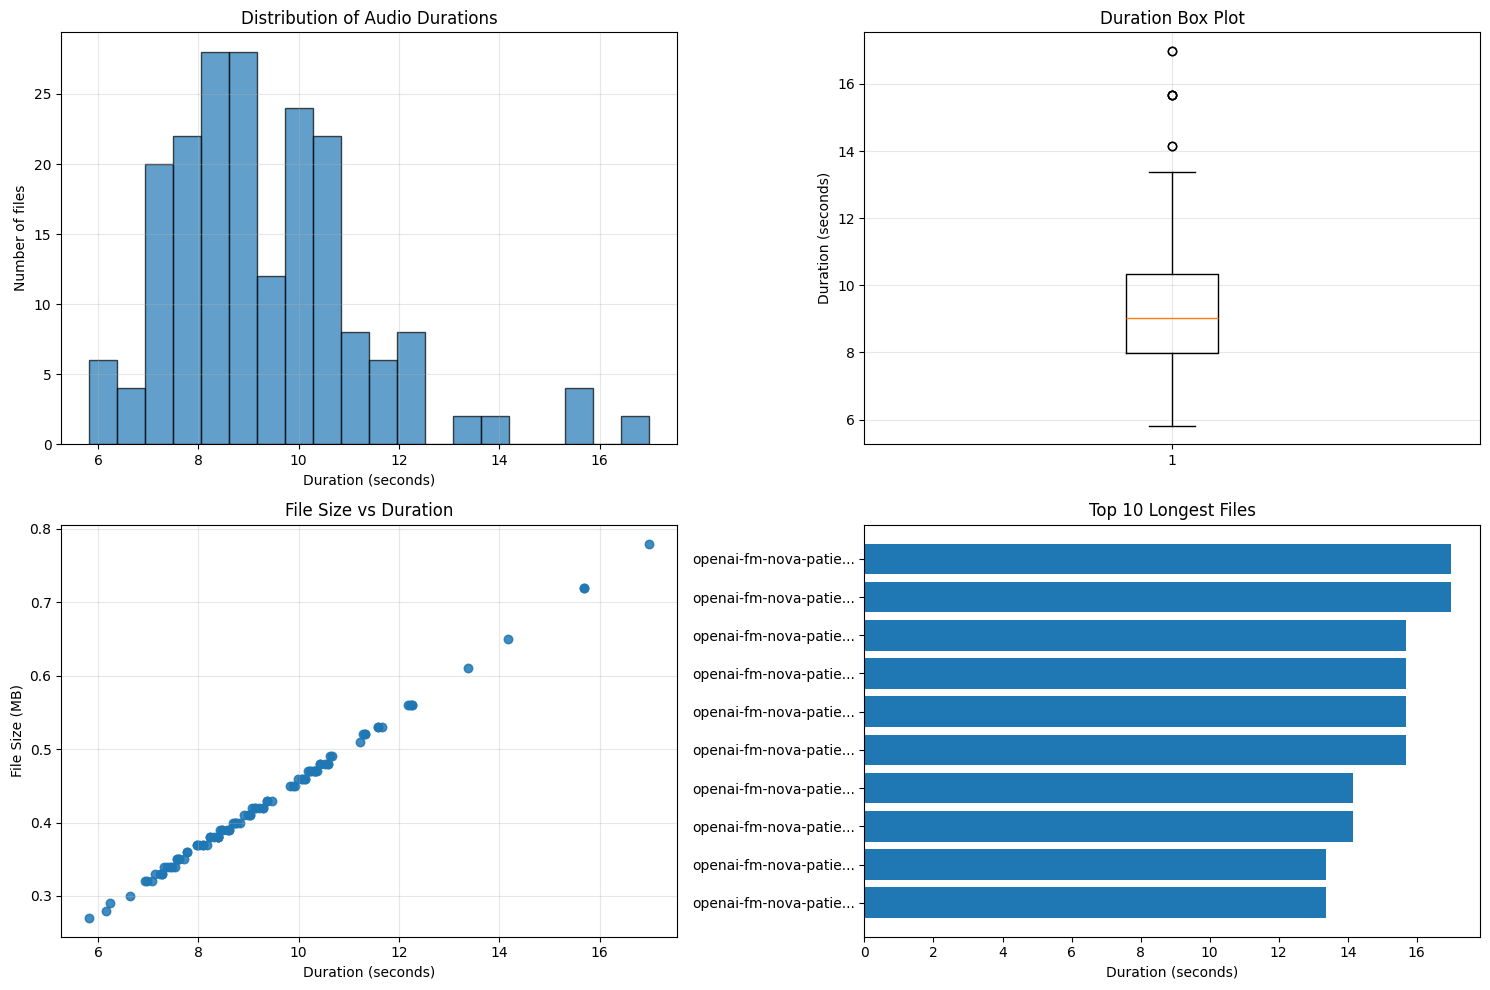


📋 DETAILED FILE LIST:
openai-fm-nova-patient-teacher-(68).wav            | 0:00:16      |     0.78 MB
openai-fm-nova-patient-teacher-(68).wav            | 0:00:16      |     0.78 MB
openai-fm-nova-patient-teacher-(72).wav            | 0:00:15      |     0.72 MB
openai-fm-nova-patient-teacher-(10).wav            | 0:00:15      |     0.72 MB
openai-fm-nova-patient-teacher-(10).wav            | 0:00:15      |     0.72 MB
openai-fm-nova-patient-teacher-(72).wav            | 0:00:15      |     0.72 MB
openai-fm-nova-patient-teacher-(44).wav            | 0:00:14      |     0.65 MB
openai-fm-nova-patient-teacher-(44).wav            | 0:00:14      |     0.65 MB
openai-fm-nova-patient-teacher-(1).wav             | 0:00:13      |     0.61 MB
openai-fm-nova-patient-teacher-(1).wav             | 0:00:13      |     0.61 MB
openai-fm-nova-patient-teacher-(45).wav            | 0:00:12      |     0.56 MB
openai-fm-nova-patient-teacher-(65).wav            | 0:00:12      |     0.56 MB
openai-fm-nova-pa

In [2]:
import os
import glob
import librosa
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path to your audio directory
audio_path = r"D:\OneDrive - Green Energy\Sakib\Germany\Hamzabilgen\Audio\converted_audio"

def get_audio_duration(file_path):
    """Get duration of an audio file using librosa"""
    try:
        duration = librosa.get_duration(path=file_path)
        return duration
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

def format_duration(seconds):
    """Convert seconds to hours:minutes:seconds format"""
    return str(timedelta(seconds=int(seconds)))

def analyze_audio_files(directory_path):
    """Analyze all WAV files in the directory"""
    
    # Find all WAV files
    wav_files = glob.glob(os.path.join(directory_path, "*.wav"))
    wav_files.extend(glob.glob(os.path.join(directory_path, "*.WAV")))  # Include uppercase
    
    if not wav_files:
        print("No WAV files found in the specified directory!")
        return None
    
    print(f"Found {len(wav_files)} WAV files")
    print("Analyzing files...")
    
    # Collect file information
    file_data = []
    
    for i, file_path in enumerate(wav_files):
        filename = os.path.basename(file_path)
        print(f"Processing {i+1}/{len(wav_files)}: {filename}")
        
        duration = get_audio_duration(file_path)
        if duration is not None:
            file_size = os.path.getsize(file_path) / (1024 * 1024)  # Size in MB
            
            file_data.append({
                'filename': filename,
                'duration_seconds': duration,
                'duration_formatted': format_duration(duration),
                'file_size_mb': round(file_size, 2)
            })
    
    if not file_data:
        print("No valid audio files found!")
        return None
    
    # Create DataFrame
    df = pd.DataFrame(file_data)
    
    return df

# Run the analysis
print("Starting audio file analysis...")
print("=" * 50)

df = analyze_audio_files(audio_path)

if df is not None:
    # Calculate statistics
    total_files = len(df)
    total_duration = df['duration_seconds'].sum()
    avg_duration = df['duration_seconds'].mean()
    shortest_duration = df['duration_seconds'].min()
    longest_duration = df['duration_seconds'].max()
    median_duration = df['duration_seconds'].median()
    total_size = df['file_size_mb'].sum()
    
    # Find files with shortest and longest durations
    shortest_file = df.loc[df['duration_seconds'].idxmin()]
    longest_file = df.loc[df['duration_seconds'].idxmax()]
    
    print("\n" + "=" * 50)
    print("AUDIO ANALYSIS RESULTS")
    print("=" * 50)
    
    print(f"\n📊 SUMMARY STATISTICS:")
    print(f"Total files: {total_files}")
    print(f"Total duration: {format_duration(total_duration)} ({total_duration:.2f} seconds)")
    print(f"Total file size: {total_size:.2f} MB")
    print(f"Average duration: {format_duration(avg_duration)} ({avg_duration:.2f} seconds)")
    print(f"Median duration: {format_duration(median_duration)} ({median_duration:.2f} seconds)")
    
    print(f"\n⏱️ DURATION EXTREMES:")
    print(f"Shortest: {format_duration(shortest_duration)} ({shortest_duration:.2f}s)")
    print(f"  File: {shortest_file['filename']}")
    print(f"Longest: {format_duration(longest_duration)} ({longest_duration:.2f}s)")
    print(f"  File: {longest_file['filename']}")
    
    # Additional statistics
    std_duration = df['duration_seconds'].std()
    print(f"\n📈 ADDITIONAL STATS:")
    print(f"Standard deviation: {std_duration:.2f} seconds")
    print(f"Duration range: {longest_duration - shortest_duration:.2f} seconds")
    
    # Percentiles
    print(f"\n📊 PERCENTILES:")
    for percentile in [25, 50, 75, 90, 95]:
        value = np.percentile(df['duration_seconds'], percentile)
        print(f"{percentile}th percentile: {format_duration(value)} ({value:.2f}s)")
    
    # Create visualizations
    plt.figure(figsize=(15, 10))
    
    # Duration distribution histogram
    plt.subplot(2, 2, 1)
    plt.hist(df['duration_seconds'], bins=20, alpha=0.7, edgecolor='black')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Number of files')
    plt.title('Distribution of Audio Durations')
    plt.grid(True, alpha=0.3)
    
    # Box plot
    plt.subplot(2, 2, 2)
    plt.boxplot(df['duration_seconds'])
    plt.ylabel('Duration (seconds)')
    plt.title('Duration Box Plot')
    plt.grid(True, alpha=0.3)
    
    # File size vs duration scatter plot
    plt.subplot(2, 2, 3)
    plt.scatter(df['duration_seconds'], df['file_size_mb'], alpha=0.6)
    plt.xlabel('Duration (seconds)')
    plt.ylabel('File Size (MB)')
    plt.title('File Size vs Duration')
    plt.grid(True, alpha=0.3)
    
    # Top 10 longest files
    plt.subplot(2, 2, 4)
    top_10 = df.nlargest(10, 'duration_seconds')
    plt.barh(range(len(top_10)), top_10['duration_seconds'])
    plt.yticks(range(len(top_10)), [f[:20] + "..." if len(f) > 20 else f for f in top_10['filename']])
    plt.xlabel('Duration (seconds)')
    plt.title('Top 10 Longest Files')
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    # Display detailed file list (optional - uncomment if needed)
    print(f"\n📋 DETAILED FILE LIST:")
    print("=" * 80)
    df_display = df.sort_values('duration_seconds', ascending=False)
    for idx, row in df_display.iterrows():
        print(f"{row['filename']:<50} | {row['duration_formatted']:<12} | {row['file_size_mb']:>8.2f} MB")
    
    # Save results to CSV (optional)
    output_file = os.path.join(audio_path, "audio_analysis_results.csv")
    df.to_csv(output_file, index=False)
    print(f"\n💾 Results saved to: {output_file}")
    
else:
    print("Analysis failed - no valid audio files found or processed.")